In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('C:\Countryclusters.csv')
data

,Unnamed: 0,country,latitude,longitude,language
0,0,usa,44.97,-103.77,english
1,1,canada,62.40,-96.80,english
2,2,france,46.75,2.40,french
3,3,uk,54.01,-2.53,french
4,4,germany,51.15,10.40,german
5,5,australia,-25.45,133.11,english


(-90.0, 90.0)

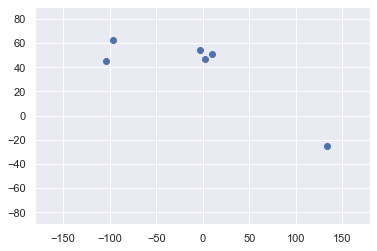

In [3]:
plt.scatter(data['longitude'],data['latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)

In [4]:
x = data.iloc[:,3:4] # 1t for rows and second for columns

In [5]:
data

,Unnamed: 0,country,latitude,longitude,language
0,0,usa,44.97,-103.77,english
1,1,canada,62.40,-96.80,english
2,2,france,46.75,2.40,french
3,3,uk,54.01,-2.53,french
4,4,germany,51.15,10.40,german
5,5,australia,-25.45,133.11,english


In [6]:
kmeans = KMeans(3)

In [7]:
kmeans

KMeans(n_clusters=3)

In [8]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

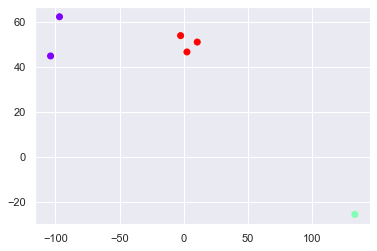

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

C:\Users\kothai\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

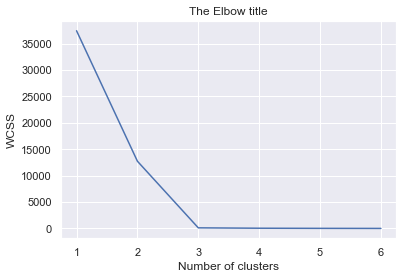

In [11]:
wcss=[]
for i in range(1,7):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')